In [252]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from joblib import Parallel, delayed


%matplotlib inline
import pickle

In [2]:
# load the data set
raw_data=pd.read_csv("/content/drive/MyDrive/customerClassifier data1/Existing_Base.csv")

In [3]:
# info gives details about the data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           10155 non-null  int64  
 1   children                         10155 non-null  object 
 2   age_band                         10155 non-null  object 
 3   status                           10155 non-null  object 
 4   occupation                       10155 non-null  object 
 5   occupation_partner               10155 non-null  object 
 6   home_status                      10155 non-null  object 
 7   family_income                    10155 non-null  object 
 8   self_employed                    10155 non-null  object 
 9   self_employed_partner            10155 non-null  object 
 10  year_last_moved                  10155 non-null  int64  
 11  TVarea                           10155 non-null  object 
 12  post_code         

In [4]:
# check the class imbalance in data. this is a common problem in classification problem
# this tells us the our data has class imblance
raw_data["Revenue Grid"].value_counts(normalize=True)

2    0.893058
1    0.106942
Name: Revenue Grid, dtype: float64

In [5]:
## split the data into training and validation set
# we would use sklearn's train_test_split functionality for the same

targets=raw_data["Revenue Grid"]
features=raw_data.drop(["Revenue Grid"],axis=1) # this line drops revenue gride from the data

features_train,features_val,target_train,target_val=train_test_split(features,targets,test_size=0.2,random_state=42,stratify=targets)

In [6]:
features_train.reset_index(drop=True,inplace=True)
features_val.reset_index(drop=True,inplace=True)
target_train.reset_index(drop=True,inplace=True)
target_val.reset_index(drop=True,inplace=True)


In [7]:
features_val.to_csv("/content/drive/MyDrive/customerClassifier data1/features_val.csv",index=None)
target_val.to_csv("/content/drive/MyDrive/customerClassifier data1/target_val.csv",index=None)

In [8]:
# get the head of the  data #
pd.set_option("display.max_columns" ,None)
pd.set_option("display.expand_frame_repr",False)
pd.set_option("max_colwidth",-1)
features_train.head(20)

<ipython-input-8-e38b23e82457>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("max_colwidth",-1)


,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,6756,2,31-35,Partner,Housewife,Other,Own Home,">=35,000",No,No,1988,Granada,WA4 4QG,WA4,64.48,29.49,9.99,47.96,7.49,18.46,5.99,19.98,0.00,8.99,0.00,Female,North West,31.88,8.90,16.65,53.28
1,5618,1,31-35,Partner,Housewife,Professional,Own Home,"<30,000, >=27,500",No,No,1995,Carlton,CM16 6DW,CM16,0.00,174.47,21.48,97.94,52.16,34.93,0.00,89.43,5.98,7.98,0.00,Female,South East,69.21,23.05,46.74,127.76
2,6486,2,31-35,Partner,Housewife,Professional,Own Home,"<27,500, >=25,000",No,No,1987,Ulster,BT23 7BN,BT23,30.48,19.49,0.52,50.94,21.98,5.99,11.99,17.48,4.99,0.00,0.00,Female,Northern Ireland,24.68,6.74,18.90,62.98
3,4557,1,51-55,Partner,Housewife,Professional,Own Home,">=35,000",No,Yes,1982,Central,B45 8LX,B45,0.01,0.00,0.00,0.00,0.00,0.00,111.95,0.00,0.00,0.00,0.00,Female,West Midlands,0.00,18.66,18.66,48.14
4,2450,3,26-30,Partner,Other,Manual Worker,Own Home,"<25,000, >=22,500",No,No,1988,Granada,WA5 1XU,WA5,0.00,0.03,0.00,192.85,0.00,71.97,0.00,48.43,0.00,0.00,0.00,Female,North West,38.58,20.07,52.21,132.89
5,821,2,26-30,Partner,Other,Professional,Own Home,"<27,500, >=25,000",Yes,No,1987,Granada,FY5 2ER,FY5,0.00,79.47,0.00,61.47,0.00,29.99,0.00,11.99,0.00,9.98,0.00,Male,North West,28.19,8.66,17.24,79.22
6,10382,Zero,31-35,Single/Never Married,Secretarial/Admin,Unknown,Own Home,"<27,500, >=25,000",No,No,1997,Scottish TV,EH26 0QU,EH26,0.00,0.00,19.99,9.49,0.00,8.99,0.00,0.00,0.00,0.00,0.00,Female,Scotland,5.90,1.50,3.08,-10.51
7,8316,Zero,51-55,Widowed,Retired,Unknown,Own Home,"< 4,000",No,No,1993,Yorkshire,YO13 9LR,YO13,0.00,29.47,10.00,11.94,4.99,9.43,0.00,10.95,0.00,0.00,0.00,Female,Unknown,11.28,3.40,6.22,-9.31
8,10196,Zero,41-45,Partner,Housewife,Unknown,Own Home,"<10,000, >= 8,000",No,Yes,1993,HTV,SN15 4HD,SN15,74.40,34.47,0.01,64.94,64.45,129.93,0.00,98.91,0.00,21.46,0.00,Female,South West,47.65,41.72,59.71,176.27
9,5374,Zero,31-35,Partner,Housewife,Manual Worker,Own Home,"<15,000, >=12,500",No,No,1984,Granada,LA9 7LR,LA9,0.00,0.00,0.00,0.52,0.00,4.49,0.00,0.00,0.00,0.00,0.00,Female,North,0.10,0.75,0.84,-51.04


### understand the object columns ####
### understanding the childern columns ###
#### how any unique values##
#### what is the distribution of each unique values ##
###????#

In [9]:
train_uniq_values = {}

def children_numeric_converter(children_data, unique_values):
  children_data[~ (children_data.isin(unique_values))] = "Zero"
  children_data[children_data == "Zero"] = 0
  children_data[children_data == "4+"] = 4
  children_data =pd.to_numeric(children_data)
  return children_data




features_train["children"].nunique()

features_train["children"].value_counts()

uniq_values= features_train["children"].unique()

children_numeric = children_numeric_converter(features_train['children'],uniq_values)

features_train.drop(["children"],axis=1,inplace=True) # drops the children column

features_train["children"] = children_numeric

train_uniq_values["children"] = uniq_values

<ipython-input-9-604842c9342d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children_data[~ (children_data.isin(unique_values))] = "Zero"
<ipython-input-9-604842c9342d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children_data[children_data == "Zero"] = 0
<ipython-input-9-604842c9342d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children_data[children_data == "4+"] = 4


In [10]:
## Analyzing the post column#
columns_to_remove = []
features_train["post_code"].nunique()
features_train["post_area"].nunique()

### gives me an impression that i can drop this columns

features_train.drop(["post_code","post_area","REF_NO"],axis=1,inplace=True)
columns_to_remove.extend(["post_code","post_area","REF_NO"])

In [11]:
## analyzing the age band columns##

def ageband_numeric_converter(ageband_data,uniq_values):
  def __split(x):
     splits = x.split('-')
     left_val = splits[0]
     right_val = splits[1]
     mean = (float(left_val) + float(right_val))/2
     return mean


  ageband_data[~ (ageband_data.isin(uniq_values))] = "45-50"
  ageband_data[ageband_data == "71+"] = "71-75"
  ageband_data[ageband_data == "Unknown"] = "45-50"
  mean_vals = ageband_data.apply(__split)
  return mean_vals

features_train["age_band"].nunique()
features_train["age_band"].value_counts()
ageband_unique= features_train["age_band"].unique()
numeric_age_band= ageband_numeric_converter(features_train["age_band"],ageband_unique)
features_train.drop(["age_band"],axis=1)
features_train["age_band"] = numeric_age_band
train_uniq_values["age_band"] = ageband_unique

## Analyzing the gender columns ####
def gender_numeric_converter(gender_data,uniq_values):
  gender_data[~(gender_data.isin(uniq_values))] ="Female"
  gender_data[gender_data == "Unknown"] ="Female"
  gender_data[gender_data == "Male"] = 0
  gender_data[gender_data == "Female"] = 1
  gender_data= pd.to_numeric(gender_data)
  return gender_data

gender_uniq = features_train["gender"].unique()
gender_numeric = gender_numeric_converter(features_train["gender"],gender_uniq)


features_train.drop(["gender"],axis=1,inplace=True)
features_train["gender"] = gender_numeric
train_uniq_values["gender"] = gender_uniq

<ipython-input-11-3cca865d42f1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ageband_data[~ (ageband_data.isin(uniq_values))] = "45-50"
<ipython-input-11-3cca865d42f1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ageband_data[ageband_data == "71+"] = "71-75"
<ipython-input-11-3cca865d42f1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ageband_data[ageband_data == "Unknown"] = "45-50"
<ipython-input-11-3cca865d42f1>:28: Se

In [12]:
missing_value_replacement = {}
missing_value_replacement["status"] = ["Partner"]
missing_value_replacement["occupation"] = ["Professional"]
missing_value_replacement["occupation_partner"] = ["Unknown","Professional"]
missing_value_replacement["home_status"] = ["Own Home"]
missing_value_replacement["self_employed"] = ["No"]
missing_value_replacement["self_employed_partner"] = ["No"]
missing_value_replacement["TVarea"] = ["Central","Carlton","Meridian"]
missing_value_replacement["region"] = ["South East"]
missing_value_replacement["family_income"] = [">=35,000"]
missing_value_replacement[" Average Credit Card Transaction"] = ["0.0"]
missing_value_replacement["Balance Transfer"] = ["16.975"]
missing_value_replacement["Term Deposit"] = ["0.0"]
missing_value_replacement["Life Insurance"] = ["30"]
missing_value_replacement["Medical Insurance"] = ["0.0"]
missing_value_replacement["Average A/C Balance"] = ["15"]
missing_value_replacement["Personal Loan"] = ["0.0"]
missing_value_replacement["Investment in Mutual Fund"] = ["23.47"]
missing_value_replacement["Investment Tax Saving Bond"] = ["0.0"]
missing_value_replacement["Home Loan"] = ["0.0"]
missing_value_replacement["Online Purchase Amount"] = ["0.0"]
missing_value_replacement["Investment in Commudity"] = ["23.79"]
missing_value_replacement["Investment in Equity"] = ["12.82"]
missing_value_replacement["Investment in Derivative"] = ["20.895"]
missing_value_replacement["Portfolio Balance"] = ["65.38"]

In [13]:
# Analyzing the column object type ##
One_hot_converter_columns=["status","occupation","occupation_partner","home_status","self_employed","self_employed_partner","TVarea","region","family_income"]
encoder = OneHotEncoder()
encoder.fit(features_train[One_hot_converter_columns])
encoded_data = pd.DataFrame(encoder.transform(features_train[One_hot_converter_columns]).toarray())
encoded_data.columns = encoder.get_feature_names_out()
features_train.drop(One_hot_converter_columns,axis=1,inplace=True)
features_train=pd.concat([features_train,encoded_data],axis=1)

In [14]:
columns_to_remove.append("year_last_moved")
features_train.drop(["year_last_moved"],axis=1,inplace=True)

In [15]:
## save this encoder object ###
with open("column_encoder.pickle","wb")as f:
  pickle.dump(encoder,f)
with open("columns_to_remove.pickle","wb")as f:
  pickle.dump(columns_to_remove,f)
with open("column_unique_values.pickle","wb")as f:
  pickle.dump(train_uniq_values,f)
## column sequence
with open("column_sequence.pickle","wb") as f:
  pickle.dump(list(features_train.columns),f)
## missing values
with open("missing_value_replacement.pickle","wb") as f:
  pickle.dump(missing_value_replacement,f)

In [16]:
### load the required files


with open('column_encoder.pickle', 'rb') as f:
   encoder=pickle.load(f)

with open('column_unique_values.pickle', 'rb') as f:
   uniq_values=pickle.load(f)

with open('columns_to_remove.pickle', 'rb') as f:
   cols_to_remove=pickle.load(f)

with open('missing_value_replacement.pickle', 'rb') as f:
   missing_value_replacement=pickle.load(f)

with open('column_sequence.pickle', 'rb') as f:
   column_seq = pickle.load(f)

In [17]:
### Initialize the required predefined functions
def children_numeric_converter(children_data, unique_values):
  children_data[~(children_data.isin(unique_values))] = "Zero" # This replaces every other value to Zero
  children_data[children_data=='Zero'] = 0  # Converts Zero to numeric 0
  children_data[children_data=='4+'] = 4    # Converts 4+ to 4
  children_data = pd.to_numeric(children_data) # Converts children_data to numeric
  return children_data


def ageband_numeric_converter(ageband_data, uniq_values):

  def __split(x):
    splits = x.split('-')
    left_val = splits[0]
    right_val = splits[1]
    mean = (float(left_val) + float(right_val))/2
    return mean

  ageband_data[~(ageband_data.isin(uniq_values))] = '45-50'
  ageband_data[ageband_data=='71+'] = '71-75'
  ageband_data[ageband_data=='Unknown'] = '45-50'
  mean_vals = ageband_data.apply(__split)
  return mean_vals


def gender_numeric_converter(gender_data, uniq_values):
  gender_data[~(gender_data.isin(uniq_values))] = 'Female'
  gender_data[gender_data=='Unknown'] = 'Female'
  gender_data[gender_data=='Male'] = 0
  gender_data[gender_data=='Female'] = 1
  gender_data = pd.to_numeric(gender_data)
  return gender_data

In [18]:
### preprocessing function

def preprocess_val_test(data):
  ####drop columns###
  for column in cols_to_remove:
    data.drop([column],axis=1,inplace=True)

  children_uniq= uniq_values["children"]
  children_numeric = children_numeric_converter(data["children"],children_uniq)
  data.drop(["children"],axis=1,inplace=True)
  data["children"]= children_numeric

  ageband_uniq= uniq_values["age_band"]
  ageband_numeric = ageband_numeric_converter(data["age_band"],ageband_uniq)
  data.drop(["age_band"],axis=1,inplace=True)
  data["age_band"]= ageband_numeric

  gender_uniq= uniq_values["gender"]
  gender_numeric = gender_numeric_converter(data["gender"],gender_uniq)
  data.drop(["gender"],axis=1,inplace=True)
  data["gender"]= gender_numeric


  ### missing value imputation
  missing_value_columns = list(data.isnull().sum()[data.isnull().sum()>0].index)
  for column in missing_value_columns:
    replacement_values = missing_replacement[column]
    if len(replacement_values) !=1:
      replace_with = np.randam.choice(replacement_values,data[column].isnull().sum())
    else:
      replace_with=replacement_values[0]
      data[data[column].isnull(),column]= replace_with


    #### one hot encoding ##
  one_hot_converted_columns = ['status', 'occupation', 'occupation_partner', 'home_status', 'self_employed', 'self_employed_partner', 'TVarea', 'region', 'family_income']
  encoded_data = pd.DataFrame(encoder.transform(data[one_hot_converted_columns]).toarray())
  encoded_data.columns = encoder.get_feature_names_out()
  data.drop(one_hot_converted_columns, axis=1, inplace=True)
  data = pd.concat([data, encoded_data], axis=1)

## ensure that the columns ordering and the columns are same##
  data=data[column_seq]
  return data

In [19]:
features_val = preprocess_val_test(features_val)

<ipython-input-17-8702c8a368af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children_data[~(children_data.isin(unique_values))] = "Zero" # This replaces every other value to Zero
<ipython-input-17-8702c8a368af>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children_data[children_data=='Zero'] = 0  # Converts Zero to numeric 0
<ipython-input-17-8702c8a368af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children_data[children

In [20]:
# modeling
## we are going to start with the basic model and then optimize the model to get the best performance!!##
# class2 are low revenue customers and class 1 are high revenue customers #
# we see that there exists a class imbalance
# class imbalance is a problem (90% are 2 and 10% are 1)



target_train.value_counts()
target_train[target_train == 2] = 0
target_train[target_train == 1] = 1

target_val[target_val == 2] = 0
target_val[target_val == 1] = 1

# simplest algorithm that comes to mind:- logistic regression,KNN




In [21]:
##Decision Tree with depth 1
model_dt_1=DecisionTreeClassifier(random_state=42,max_depth=1,class_weight={0:1.2,1:4.5},max_features="sqrt")
model_dt_1.fit(features_train,target_train)
model_dt_1_score_train=model_dt_1.score(features_train,target_train)
model_dt_1_score_val=model_dt_1.score(features_val,target_val)
print("Training score",model_dt_1_score_train)
print("Testing score",model_dt_1_score_val)

Training score 0.8593057607090103
Testing score 0.8483505662235352


In [22]:
##Decision Tree with depth 2
model_dt_2=DecisionTreeClassifier(random_state=42,max_depth=2,class_weight={0:1,1:4.5},max_features="sqrt")
model_dt_2.fit(features_train,target_train)
model_dt_2_score_train=model_dt_2.score(features_train,target_train)
model_dt_2_score_val=model_dt_2.score(features_val,target_val)
print("Training score",model_dt_2_score_train)
print("Testing score",model_dt_2_score_val)

Training score 0.8593057607090103
Testing score 0.8483505662235352


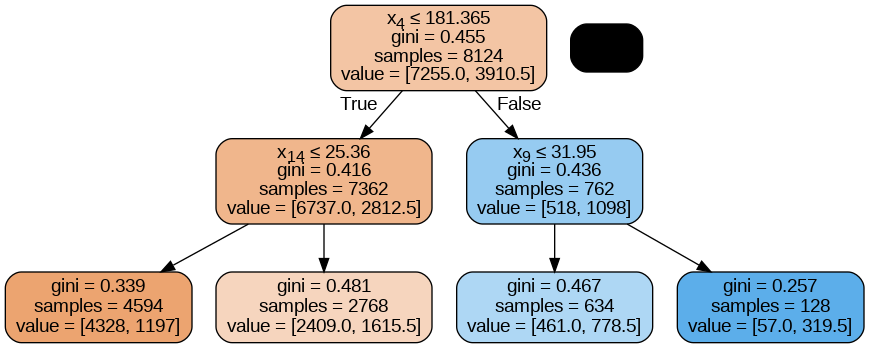

<Figure size 1000x800 with 0 Axes>

In [23]:
!pip install pydotplus
from io import StringIO
from six import StringIO

#pip install graphviz
#conda install graphviz
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
plt.figure(figsize=(10,8))
dot_data = StringIO()
export_graphviz(model_dt_2,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())



In [24]:
!pip install matplotlib-venn
!pip install cartopy
import cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 22.7 MB/s eta 0:00:00


In [25]:
##Decision Tree with depth 3
model_dt_3=DecisionTreeClassifier(random_state=42,max_depth=3,class_weight={0:1,1:4.5},max_features="sqrt")
model_dt_3.fit(features_train,target_train)
model_dt_3_score_train=model_dt_3.score(features_train,target_train)
model_dt_3_score_val=model_dt_3.score(features_val,target_val)
print("Training score",model_dt_3_score_train)
print("Testing score",model_dt_3_score_val)

Training score 0.8680452978828164
Testing score 0.8527818808468735


In [26]:
##Decision Tree with depth 4
model_dt_4=DecisionTreeClassifier(random_state=42,max_depth=4,class_weight={0:1.2,1:4.5},max_features="sqrt")
model_dt_4.fit(features_train,target_train)
model_dt_4_score_train=model_dt_4.score(features_train,target_train)
model_dt_4_score_val=model_dt_4.score(features_val,target_val)
print("Training score",model_dt_4_score_train)
print("Testing score",model_dt_4_score_val)

Training score 0.8645987198424422
Testing score 0.844903988183161


In [27]:
##Decision Tree with depth 6
model_dt_6=DecisionTreeClassifier(random_state=42,max_depth=6,class_weight={0:1.2,1:5.5},max_features="sqrt")
model_dt_6.fit(features_train,target_train)
model_dt_6_score_train=model_dt_6.score(features_train,target_train)
model_dt_6_score_val=model_dt_6.score(features_val,target_val)
print("Training score",model_dt_6_score_train)
print("Testing score",model_dt_6_score_val)

Training score 0.8898325947808962
Testing score 0.8705071393402265


In [28]:
##Decision Tree with depth 8
model_dt_8=DecisionTreeClassifier(random_state=42,max_depth=8,class_weight={0:1,1:5.5},max_features="sqrt")
model_dt_8.fit(features_train,target_train)
model_dt_8_score_train=model_dt_8.score(features_train,target_train)
model_dt_8_score_val=model_dt_8.score(features_val,target_val)
print("Training score",model_dt_8_score_train)
print("Testing score",model_dt_8_score_val)

Training score 0.914081733136386
Testing score 0.8774002954209749


In [29]:
# Decision Tree with c4.5(entropy)

model_dt=DecisionTreeClassifier(max_depth=2,criterion="entropy")
model_dt.fit(features_train,target_train)
y_pred_dt=model_dt.predict_proba(features_val)
#Y-PRED_DT
model_dt_score_train=model_dt.score(features_train,target_train)
print(model_dt_score_train)
model_dt_score_test=model_dt.score(features_val,target_val)
print(model_dt_score_test)

0.9258985721319547
0.914327917282127


In [30]:
y_pred_dt

array([[0.86260131, 0.13739869],
       [0.98358995, 0.01641005],
       [0.40710383, 0.59289617],
       ...,
       [0.98358995, 0.01641005],
       [0.86260131, 0.13739869],
       [0.98358995, 0.01641005]])

# LogisticRegression

In [31]:
## LogisticRegression

lr = LogisticRegression(max_iter=1000,solver="newton-cholesky",class_weight={0:1.1,1:2.5})
lr.fit(features_train,target_train) #model training happens

LogisticRegression(class_weight={0: 1.1, 1: 2.5}, max_iter=1000,
                   solver='newton-cholesky')

In [32]:
## model prediction here ###
tr_pred = lr.predict(features_train)
val_pred = lr.predict(features_val)

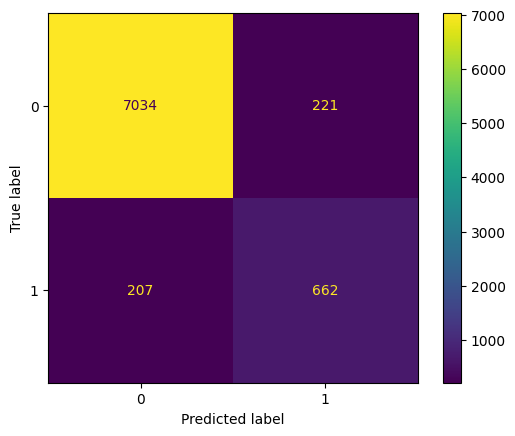

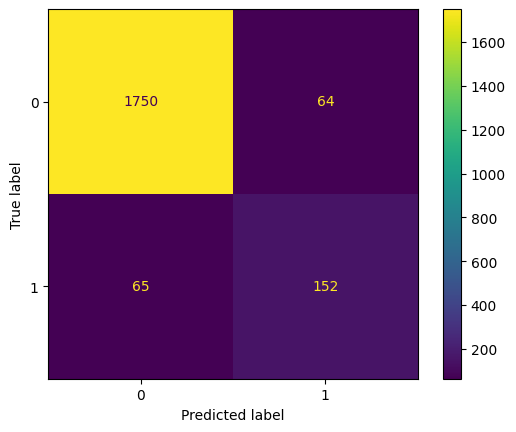

In [33]:
### model performance
## ConfusionMatrixDisplay,f1_score

ConfusionMatrixDisplay.from_predictions(target_train,tr_pred)
ConfusionMatrixDisplay.from_predictions(target_val,val_pred)

In [34]:
train_f1 = f1_score(target_train,tr_pred)
val_f1 = f1_score(target_val,val_pred)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 0.7557077625570776
val F1 Score - 0.7020785219399538


# KNeighborsClassifier

In [35]:
### K nearest neighbors ##
knn= KNeighborsClassifier(leaf_size=90,n_neighbors=5,weights="uniform",p=4,n_jobs=-1)
knn.fit(features_train,target_train)

KNeighborsClassifier(leaf_size=90, n_jobs=-1, p=4)

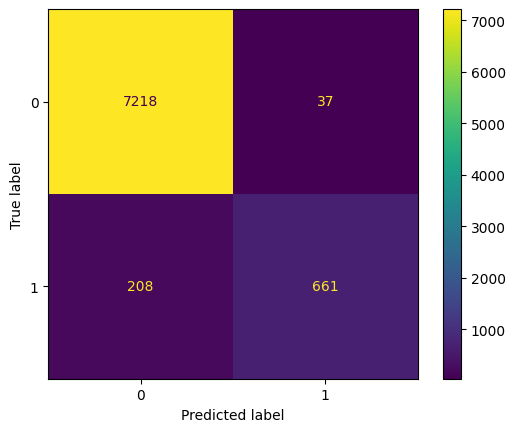

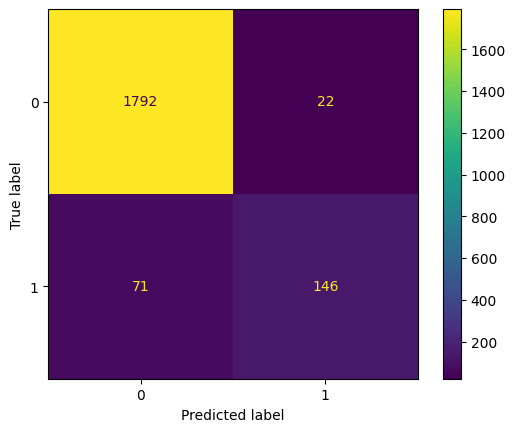

In [36]:
tr_pred = knn.predict(features_train)
val_pred = knn.predict(features_val)
ConfusionMatrixDisplay.from_predictions(target_train,tr_pred)
ConfusionMatrixDisplay.from_predictions(target_val,val_pred)

In [37]:
train_f1 = f1_score(target_train,tr_pred)
val_f1 = f1_score(target_val,val_pred)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 0.843650287172942
val F1 Score - 0.7584415584415585


In [38]:
# best knn train and test predicts
#{'leaf_size': 80, 'n_jobs': -1, 'n_neighbors': 7, 'p': 5, 'weights': 'uniform'}
#train-0.80584704399706
#test-0.763536411836624
#{'leaf_size': 90, 'n_jobs': -1, 'n_neighbors': 5, 'p': 4, 'weights': 'uniform'}
#train-0.836432642942266
#test-0.766568445299893

# RandomForestClassifier

In [39]:
## Random Forest ##

clf= RandomForestClassifier(max_depth=None,
                          n_estimators=1000,
                          class_weight={0:0.9,1:4},
                          min_samples_split=80)
clf.fit(features_train,target_train)


RandomForestClassifier(class_weight={0: 0.9, 1: 4}, min_samples_split=80,
                       n_estimators=1000)

In [40]:
## model prediction here ###
tr_pred = clf.predict(features_train)
val_pred = clf.predict(features_val)

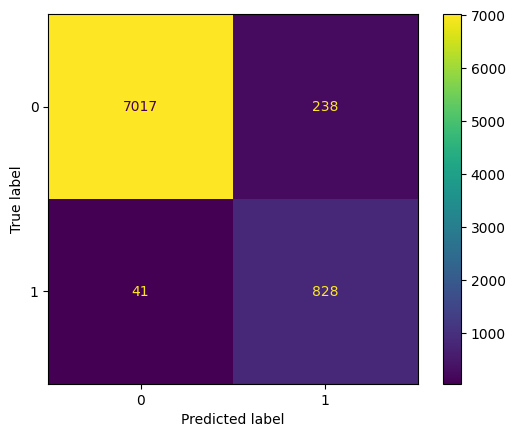

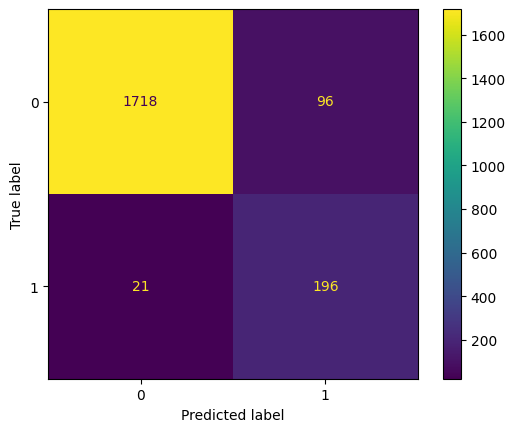

In [41]:
### model performance
## ConfusionMatrixDisplay,f1_score
ConfusionMatrixDisplay.from_predictions(target_train,tr_pred)
ConfusionMatrixDisplay.from_predictions(target_val,val_pred)

In [42]:
train_f1 = f1_score(target_train,tr_pred)
val_f1 = f1_score(target_val,val_pred)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 0.8558139534883722
val F1 Score - 0.7701375245579567


# DecisionTreeClassifier

In [135]:
# DecisionTreeClassifier
bestdt= DecisionTreeClassifier(max_depth=10,
                          random_state=42,
                          min_samples_split=3,
                          min_samples_leaf=6,
                          splitter = 'best',
                          class_weight={0:1.3,1:3.5},
                          max_features=0.9)
bestdt.fit(features_train,target_train)

DecisionTreeClassifier(class_weight={0: 1.3, 1: 3.5}, max_depth=10,
                       max_features=0.9, min_samples_leaf=6,
                       min_samples_split=3, random_state=42)

In [136]:
## model prediction here ###
tr_pred = bestdt.predict(features_train)
val_pred = bestdt.predict(features_val)

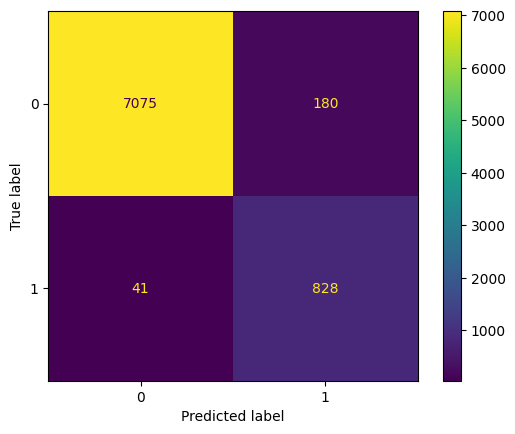

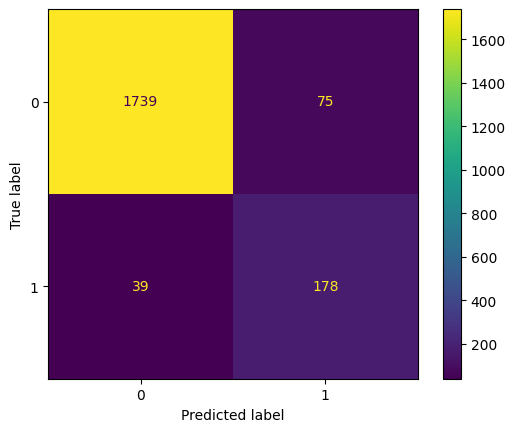

In [137]:
ConfusionMatrixDisplay.from_predictions(target_train,tr_pred)
ConfusionMatrixDisplay.from_predictions(target_val,val_pred)

In [138]:
train_f1 = f1_score(target_train,tr_pred)
val_f1 = f1_score(target_val,val_pred)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 0.8822589238145978
val F1 Score - 0.7574468085106383


In [49]:
# best of dt is 4th
# 1 {'class_weight': {0: 1.2, 1: 3}, 'max_depth': 8, 'max_features': 0.5, 'random_state': 42}
# MeanTrainScore-0.881380049090244
# MeanTestScore-0.757994325380203
# 2 {'class_weight': {0: 1.2, 1: 4.5}, 'max_depth': 8, 'max_features': 0.5, 'random_state': 42}
# MeanTrainScore-0.855820088433373
# MeanTestScore-0.750246129173626

# 3 {'class_weight': {0: 1.3, 1: 3.5}, 'criterion': 'gini', 'max_depth': 8, 'max_features': 0.8, 'random_state': 42}
# MeanTrainScore -0.888408995386263
# MeanTestScore- 0.763069976663803

# 4 {'class_weight': {0: 1.3, 1: 3.5}, 'criterion': 'gini', 'max_depth': 10, 'max_features': 0.9, 'min_samples_leaf': 6, 'min_samples_split': 3, 'random_state': 42, 'splitter': 'best'}
# MeanTrainScore -0.884502968207778
# MeanTestScore -0.78772254087704

# GridSearchCV

In [50]:
#GridSearchCV

dt_gv=DecisionTreeClassifier()
params_grid={
    "random_state":[42],
    "max_depth":[8,9,10,12,13,20],
    "criterion":["gini","entropy"],
    "splitter":["best","random"],
    "min_samples_leaf":[2,4,6,8],
    "min_samples_split":[3,4,5,6,7],
    "max_features":["sqrt",0.5,0.8,0.9],
    "class_weight":[{0:1.2,1:3},{0:1.3,1:3.5},{0:1.2,1:4.5},{0:1.2,1:5},{0:0.9,1:4.5},{0:1,1:5.5}]
}

grid_search_cv=GridSearchCV(
    estimator=dt_gv,
    param_grid=params_grid,
    scoring="f1",
    cv=5,
    return_train_score=True
)
grid_search_cv.fit(features_train,target_train)

# RandomizedSearchCV

In [ ]:
# RandomizedSearchCV

# Define the model
dt = DecisionTreeClassifier()

# Define the hyperparameter space
params = {
    "random_state": [42],
    "max_depth": np.arange(8, 21),
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "min_samples_leaf": np.arange(2, 9),
    "min_samples_split": np.arange(3, 8),
    "max_features": ["sqrt", 0.5, 0.8, 0.9],
    "class_weight": [{0:1.2,1:3},{0:1.3,1:3.5},{0:1.2,1:4.5},{0:1.2,1:5},{0:0.9,1:4.5},{0:1,1:5.5}]
}

# Define the search method
search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=params,
    scoring="f1",
    cv=5,
    n_iter=100,
    return_train_score=True,
    n_jobs=-1 # use all available cores
)



In [52]:
# Fit the search method on the data
search.fit(features_train, target_train)

# Print the best parameters and score
print(search.best_params_)
print(search.best_score_)


{'splitter': 'best', 'random_state': 42, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 0.9, 'max_depth': 11, 'criterion': 'gini', 'class_weight': {0: 1.3, 1: 3.5}}
0.7760918999983645


# GradientBoostingClassifier

In [56]:
# GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=500,learning_rate=0.5,max_depth=8,min_samples_split=0.3)
gbc.fit(features_train,target_train) #model training happens

GradientBoostingClassifier(learning_rate=0.5, max_depth=8,
                           min_samples_split=0.3, n_estimators=500)

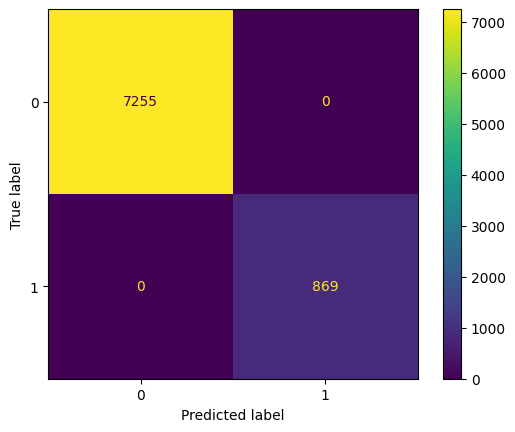

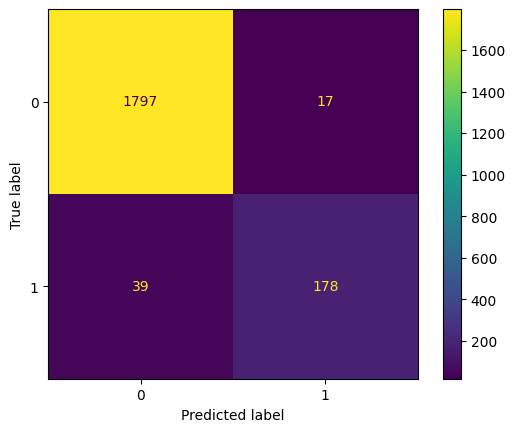

In [57]:
tr_pred = gbc.predict(features_train)
val_pred = gbc.predict(features_val)
ConfusionMatrixDisplay.from_predictions(target_train,tr_pred)
ConfusionMatrixDisplay.from_predictions(target_val,val_pred)

In [58]:
train_f1 = f1_score(target_train,tr_pred)
val_f1 = f1_score(target_val,val_pred)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 1.0
val F1 Score - 0.8640776699029126


# FINDING BEST VALUE OF GradientBoostingClassifier

In [59]:
best_gbc= GradientBoostingClassifier(max_depth=8,
                          n_estimators=9000,
                          min_samples_leaf=3,
                          loss="exponential",
                          learning_rate=0.5,
                          subsample=1.0,
                          max_features="sqrt",
                          validation_fraction=0.4,
                          n_iter_no_change=600,
                          criterion="squared_error",
                          max_leaf_nodes=10,
                          random_state=42,
                          min_samples_split=0.5)
best_gbc.fit(features_train,target_train)

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.5,
                           loss='exponential', max_depth=8, max_features='sqrt',
                           max_leaf_nodes=10, min_samples_leaf=3,
                           min_samples_split=0.5, n_estimators=9000,
                           n_iter_no_change=600, random_state=42,
                           validation_fraction=0.4)

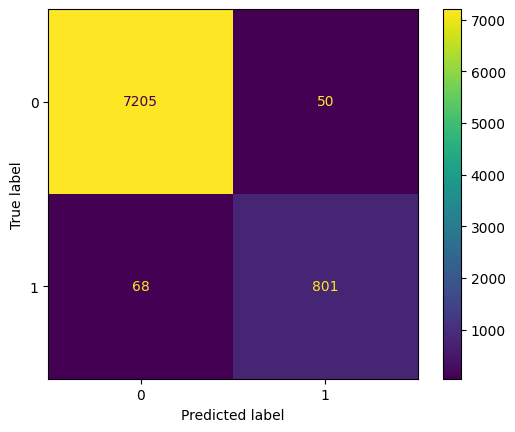

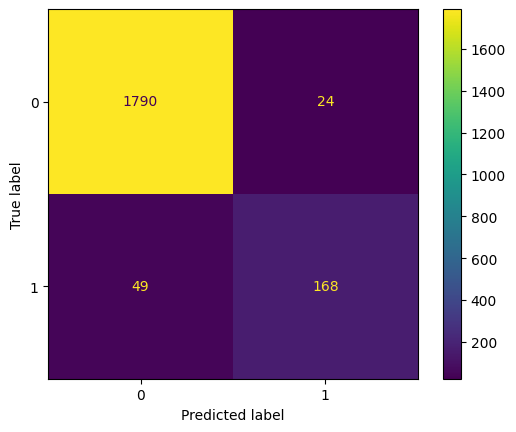

In [60]:
## model prediction here ###
tr_pred = best_gbc.predict(features_train)
val_pred = best_gbc.predict(features_val)
### model performance

ConfusionMatrixDisplay.from_predictions(target_train,tr_pred)
ConfusionMatrixDisplay.from_predictions(target_val,val_pred)

In [61]:
train_f1 = f1_score(target_train,tr_pred)
val_f1 = f1_score(target_val,val_pred)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 0.9313953488372093
val F1 Score - 0.8215158924205378


In [62]:
#
#'splitter': 'best', 'random_state': 42, 'min_samples_split': 6, 'min_samples_leaf': 2,
 #'max_features': 0.9, 'max_depth': 17, 'criterion': 'entropy', 'class_weight': {0: 1.2, 1: 5}}


# GradientBoostingClassifier


In [ ]:
# RandomizedSearchCV
# GradientBoostingClassifier

# Generate a synthetic dataset
features_train,target_train = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Define the model
gbc = GradientBoostingClassifier()

# Define the hyperparameter space
params = {
    "n_estimators": np.arange(100, 1000, 100),
    "max_depth": np.arange(3, 10),
    "criterion": ["friedman_mse", "squared_error"],
    "learning_rate": np.logspace(-3, 0, 10),
    "min_samples_leaf": np.linspace(0.1, 0.5, 5),
    "min_samples_split": np.linspace(0.1, 0.5, 5),
    "loss": ["log_loss", "exponential"]
}

# Define the search method
gbc_rs= RandomizedSearchCV(
    estimator=dt,
    param_distributions=params,
    scoring="f1",
    cv=5,
    n_iter=100,
    return_train_score=True,
    n_jobs=-1 # use all available cores
)

In [63]:
#{'class_weight': {0: 1.2, 1: 3}, 'max_depth': 4, 'max_features': 'sqrt', 'random_state': 42}  0.881380049090244
#0.757994325380203

# GridSearchCV FOR LogisticRegression

In [64]:
#GridSearchCV
lr_gv=LogisticRegression()
params_grid={
    "max_iter":[500,1000],
    "solver":["newton-cholesky","newton-cg"],
    "C":[1.3,1.4,1.5],
    "n_jobs":[-1],
    "class_weight":[{0:1.2,1:3},{0:1.3,1:3.5},{0:1.2,1:4.5},{0:1.2,1:5}]
}

grid_search_cv=GridSearchCV(
    estimator=lr_gv,
    param_grid=params_grid,
    scoring="f1",
    cv=5,
    return_train_score=True
)
grid_search_cv.fit(features_train,target_train)

In [65]:
results_df=pd.DataFrame({
    "Parameters":grid_search_cv.cv_results_["params"],
    "MeanTrainScore":grid_search_cv.cv_results_["mean_train_score"],
    "MeanTestScore":grid_search_cv.cv_results_["mean_test_score"]})

In [ ]:
results_df.to_csv("GridSearchPerformannce7.csv",index=None)

In [66]:
#{'C': 1.3, 'class_weight': {0: 1.2, 1: 3}, 'max_iter': 500, 'n_jobs': -1, 'solver': 'newton-cholesky'}
#{'C': 1.4, 'class_weight': {0: 1.3, 1: 3.5}, 'max_iter': 500, 'n_jobs': -1, 'solver': 'newton-cholesky'}
#{'C': 1.5, 'class_weight': {0: 1.3, 1: 3.5}, 'max_iter': 500, 'n_jobs': -1, 'solver': 'newton-cholesky'}

# BEST LogisticRegression

In [68]:
bestlr=LogisticRegression(class_weight={0:1.2,1:3},
                              max_iter=500,
                              C=1.3,
                              solver="newton-cholesky")
bestlr.fit(features_train,target_train)

LogisticRegression(C=1.3, class_weight={0: 1.2, 1: 3}, max_iter=500,
                   solver='newton-cholesky')

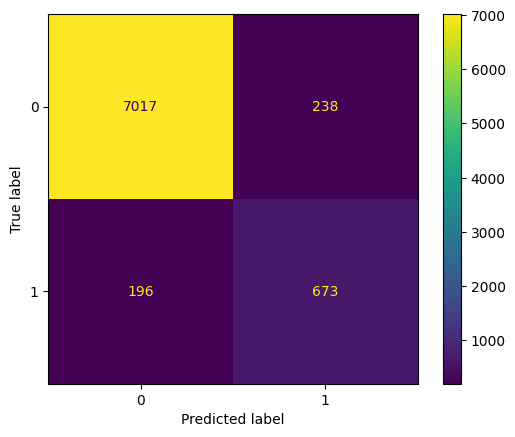

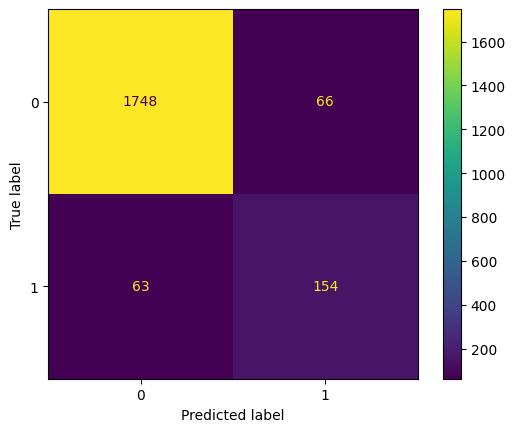

In [69]:
tr_pred = bestlr.predict(features_train)
val_pred = bestlr.predict(features_val)
ConfusionMatrixDisplay.from_predictions(target_train,tr_pred)
ConfusionMatrixDisplay.from_predictions(target_val,val_pred)

In [70]:
train_f1 = f1_score(target_train,tr_pred)
val_f1 = f1_score(target_val,val_pred)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 0.756179775280899
val F1 Score - 0.7048054919908466


In [ ]:
feature_importances=bestlr.feature_importances_
feature_names=bestlr.feature_names_in_
sorted_idx=np.argsort(bestlr.feature_importances_)[::-1]
sorted_importances=[(feature_names[i],feature_importances[i])for i in sorted_idx]

In [71]:
sorted_importances

# CREATING OWN  Ensemble of classifiers

In [72]:
### Ensemble of classifiers
tr_pred_clf=clf.predict(features_train)
tr_pred_knn=knn.predict(features_train)
tr_pred_lr=bestlr.predict(features_train)


ensembled_tr_pred=[]

for i in range(len(tr_pred_lr)):
  sum_preds=tr_pred_clf[i]+tr_pred_knn[i]+tr_pred_lr[i]
  if sum_preds>=2:
    ensembled_tr_pred.append(1)
  else:
    ensembled_tr_pred.append(0)

In [73]:
### Ensemble of classifiers
val_pred_clf=clf.predict(features_val)
val_pred_knn=knn.predict(features_val)
val_pred_lr=bestlr.predict(features_val)

ensembled_val_pred=[]

for i in range(len(val_pred_lr)):
  sum_preds=val_pred_clf[i]+val_pred_knn[i]+val_pred_lr[i]
  if sum_preds>=2:
    ensembled_val_pred.append(1)
  else:
    ensembled_val_pred.append(0)

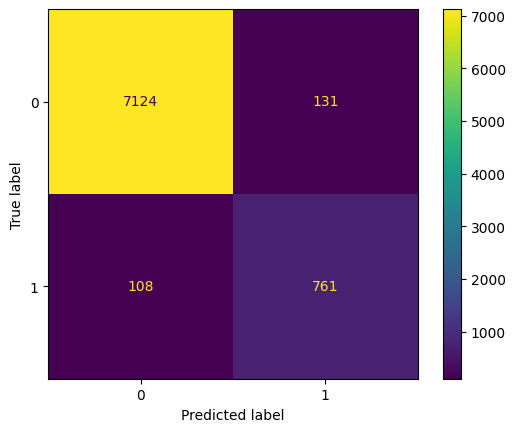

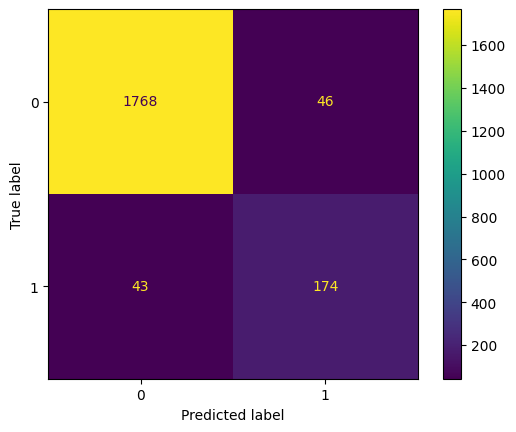

In [74]:
ConfusionMatrixDisplay.from_predictions(target_train,ensembled_tr_pred)
ConfusionMatrixDisplay.from_predictions(target_val,ensembled_val_pred)

In [75]:
train_f1 = f1_score(target_train,ensembled_tr_pred)
val_f1 = f1_score(target_val,ensembled_val_pred)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 0.8642816581487791
val F1 Score - 0.7963386727688787


# GridSearchCV FOR KNN-KNeighborsClassifier

In [76]:
#GridSearchCV

knn_gv=KNeighborsClassifier()
params_grid={
    "n_neighbors":[7,8,9,10],
    "weights":["uniform"],
    "leaf_size":[20,30,40],
    "n_jobs":[-1],
    "p":[5,6,7]
}

grid_search_cv=GridSearchCV(
    estimator=knn_gv,
    param_grid=params_grid,
    scoring="f1",
    cv=5,
    return_train_score=True
)
grid_search_cv.fit(features_train,target_train)

In [77]:
results_df=pd.DataFrame({
    "Parameters":grid_search_cv.cv_results_["params"],
    "MeanTrainScore":grid_search_cv.cv_results_["mean_train_score"],
    "MeanTestScore":grid_search_cv.cv_results_["mean_test_score"]})

In [78]:
results_df.to_csv("GridSearchPerformannce_knn1.csv",index=None)

# BEST KNeighborsClassifier

In [100]:
bestknn=KNeighborsClassifier(leaf_size=80,
                              n_neighbors=5,
                              p=4,
                              weights="uniform")
bestknn.fit(features_train,target_train)

KNeighborsClassifier(leaf_size=80, p=4)

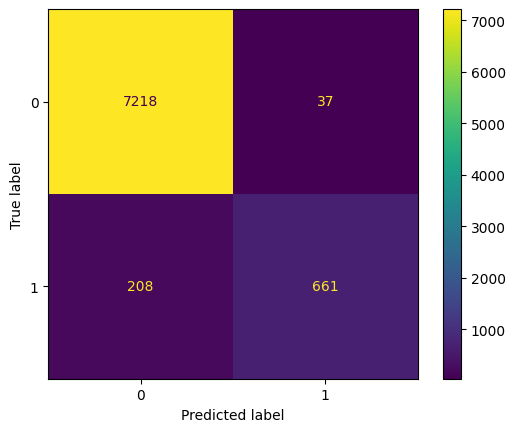

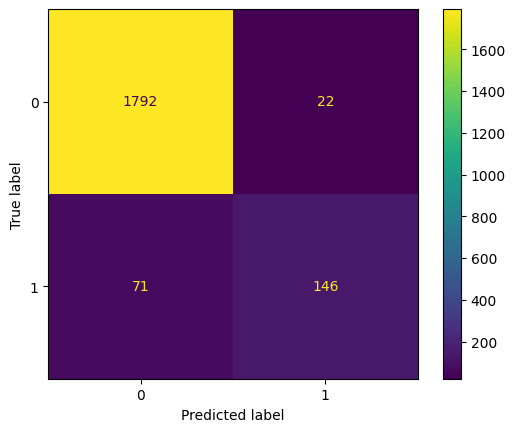

In [101]:
tr_pred = bestknn.predict(features_train)
val_pred = bestknn.predict(features_val)
ConfusionMatrixDisplay.from_predictions(target_train,tr_pred)
ConfusionMatrixDisplay.from_predictions(target_val,val_pred)

In [102]:
train_f1 = f1_score(target_train,tr_pred)
val_f1 = f1_score(target_val,val_pred)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 0.843650287172942
val F1 Score - 0.7584415584415585


### Ensemble of classifiers

In [103]:
### Ensemble of classifiers
tr_pred_clf=clf.predict(features_train)
tr_pred_lr=lr.predict(features_train)
tr_pred_knn=knn.predict(features_train)

ensembled_tr_pred=[]

for i in range(len(tr_pred_lr)):
  sum_preds=tr_pred_clf[i]+tr_pred_lr[i]+tr_pred_knn[i]
  if sum_preds>=2:
    ensembled_tr_pred.append(1)
  else:
    ensembled_tr_pred.append(0)

In [104]:
### Ensemble of classifiers
val_pred_clf=clf.predict(features_val)
val_pred_lr=lr.predict(features_val)
val_pred_knn=knn.predict(features_val)

ensembled_val_pred=[]

for i in range(len(val_pred_lr)):
  sum_preds=val_pred_clf[i]+val_pred_lr[i]+val_pred_knn[i]
  if sum_preds>=2:
    ensembled_val_pred.append(1)
  else:
    ensembled_val_pred.append(0)

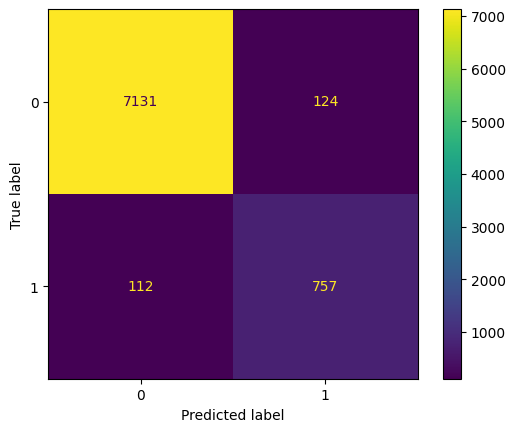

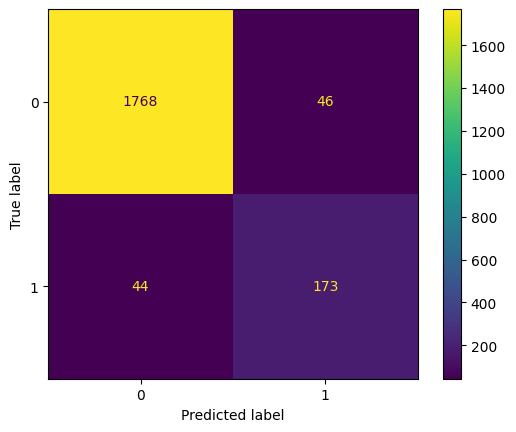

In [105]:
ConfusionMatrixDisplay.from_predictions(target_train,ensembled_tr_pred)
ConfusionMatrixDisplay.from_predictions(target_val,ensembled_val_pred)

In [106]:
train_f1 = f1_score(target_train,ensembled_tr_pred)
val_f1 = f1_score(target_val,ensembled_val_pred)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 0.8651428571428572
val F1 Score - 0.7935779816513763


In [107]:
### Ensemble of classifiers
tr_pred_clf=clf.predict(features_train)
tr_pred_lr=bestlr.predict(features_train)
tr_pred_knn=knn.predict(features_train)

ensembled_tr_pred=[]

for i in range(len(tr_pred_lr)):
  sum_preds=tr_pred_clf[i]+tr_pred_lr[i]+tr_pred_knn[i]
  if sum_preds>=2:
    ensembled_tr_pred.append(1)
  else:
    ensembled_tr_pred.append(0)

In [108]:
### Ensemble of classifiers
val_pred_clf=clf.predict(features_val)
val_pred_lr=bestlr.predict(features_val)
val_pred_knn=knn.predict(features_val)

ensembled_val_pred=[]

for i in range(len(val_pred_lr)):
  sum_preds=val_pred_clf[i]+val_pred_knn[i]+val_pred_lr[i]
  if sum_preds>=2:
    ensembled_val_pred.append(1)
  else:
    ensembled_val_pred.append(0)

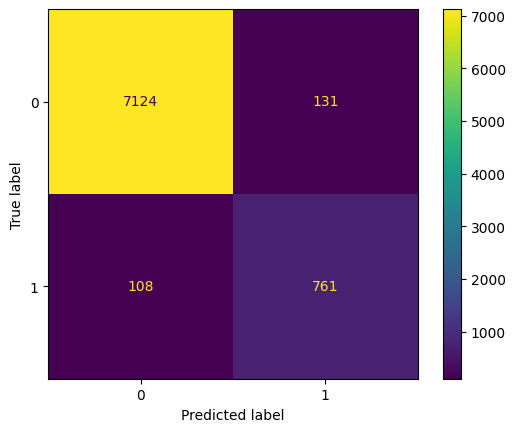

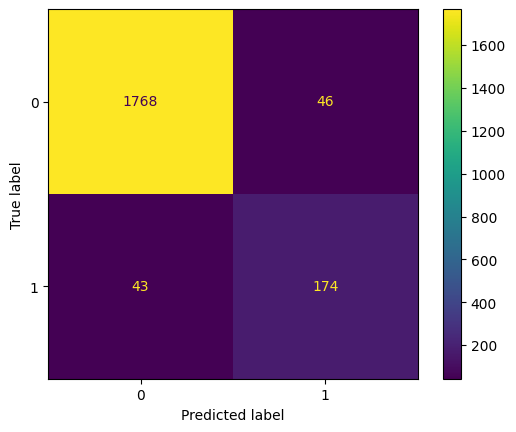

In [109]:
ConfusionMatrixDisplay.from_predictions(target_train,ensembled_tr_pred)
ConfusionMatrixDisplay.from_predictions(target_val,ensembled_val_pred)

In [110]:
train_f1 = f1_score(target_train,ensembled_tr_pred)
val_f1 = f1_score(target_val,ensembled_val_pred)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 0.8642816581487791
val F1 Score - 0.7963386727688787


# BEST RandomForestClassifier

In [82]:
bestrf=RandomForestClassifier(class_weight={0:1,1:3},
                              max_depth=None,
                              max_features=0.5,
                              min_samples_split=50,
                              n_estimators=500)
bestrf.fit(features_train,target_train)

RandomForestClassifier(class_weight={0: 1, 1: 3}, max_features=0.5,
                       min_samples_split=50, n_estimators=500)

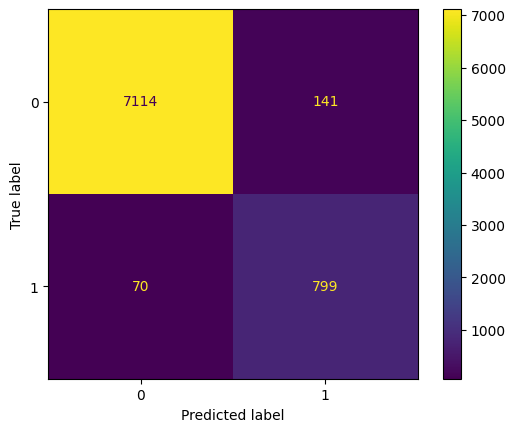

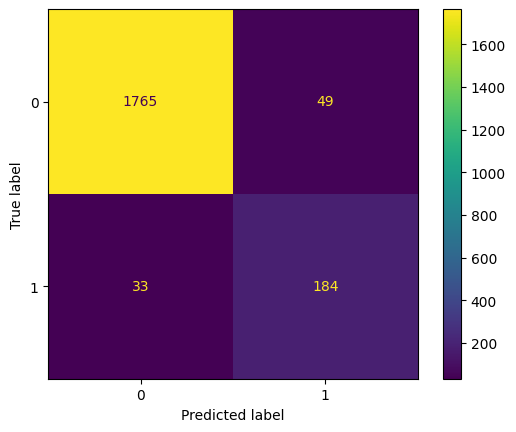

In [83]:
## model prediction here ###
tr_pred = bestrf.predict(features_train)
val_pred = bestrf.predict(features_val)
### model performance

ConfusionMatrixDisplay.from_predictions(target_train,tr_pred)
ConfusionMatrixDisplay.from_predictions(target_val,val_pred)

In [84]:
train_f1 = f1_score(target_train,tr_pred)
val_f1 = f1_score(target_val,val_pred)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 0.8833609729132118
val F1 Score - 0.8177777777777778


In [96]:
### Ensemble of classifiers
tr_pred_rf=bestrf.predict(features_train)
tr_pred_lr=bestlr.predict(features_train)
tr_pred_knn=knn.predict(features_train)
tr_pred_dt=bestdt.predict(features_train)
tr_pred_gbc=best_gbc.predict(features_train)

ensembled_tr_pred=[]

for i in range(len(tr_pred_lr)):
  sum_preds=tr_pred_rf[i]+tr_pred_lr[i]+tr_pred_knn[i]+tr_pred_dt[i]+tr_pred_gbc[i]
  if sum_preds>=2:
    ensembled_tr_pred.append(1)
  else:
    ensembled_tr_pred.append(0)

In [97]:
### Ensemble of classifiers
val_pred_rf=bestrf.predict(features_val)
val_pred_lr=bestlr.predict(features_val)
val_pred_knn=knn.predict(features_val)
val_pred_dt=bestdt.predict(features_val)
val_pred_gbc=best_gbc.predict(features_val)


ensembled_val_pred=[]

for i in range(len(val_pred_lr)):
  sum_preds=val_pred_rf[i]+val_pred_knn[i]+val_pred_lr[i]+val_pred_dt[i]+tr_pred_gbc[i]
  if sum_preds>=2:
    ensembled_val_pred.append(1)
  else:
    ensembled_val_pred.append(0)

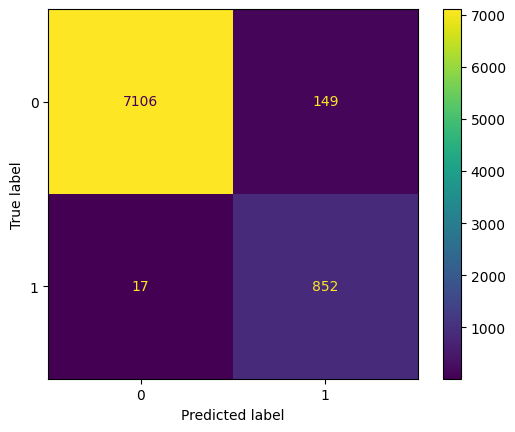

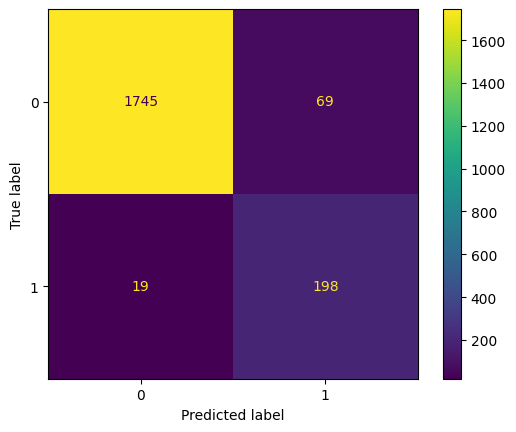

In [98]:
ConfusionMatrixDisplay.from_predictions(target_train,ensembled_tr_pred)
ConfusionMatrixDisplay.from_predictions(target_val,ensembled_val_pred)

In [99]:
train_f1 = f1_score(target_train,ensembled_tr_pred)
val_f1 = f1_score(target_val,ensembled_val_pred)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 0.9112299465240642
val F1 Score - 0.8181818181818181


In [152]:
### Ensemble of classifiers
tr_pred_rf=bestrf.predict(features_train)
tr_pred_knn=bestknn.predict(features_train)
tr_pred_gbc=best_gbc.predict(features_train)

ensembled_tr_pred=[]

for i in range(len(tr_pred_rf)):
  sum_preds=tr_pred_rf[i]+tr_pred_knn[i]+tr_pred_gbc[i]
  if sum_preds>=2:
    ensembled_tr_pred.append(1)
  else:
    ensembled_tr_pred.append(0)

In [153]:
### Ensemble of classifiers
val_pred_rf=bestrf.predict(features_val)
val_pred_knn=bestknn.predict(features_val)
val_pred_gbc=best_gbc.predict(features_val)


ensembled_val_pred=[]

for i in range(len(val_pred_rf)):
  sum_preds=val_pred_rf[i]+val_pred_knn[i]+tr_pred_gbc[i]
  if sum_preds>=2:
    ensembled_val_pred.append(1)
  else:
    ensembled_val_pred.append(0)

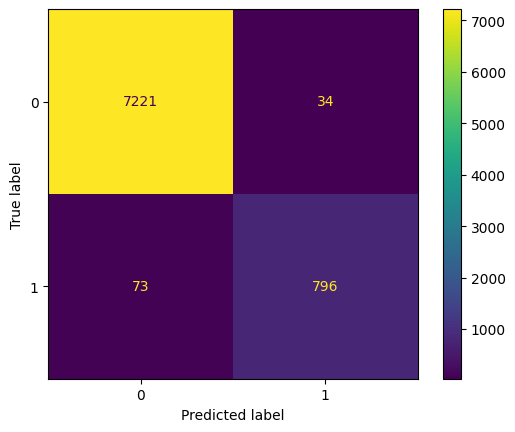

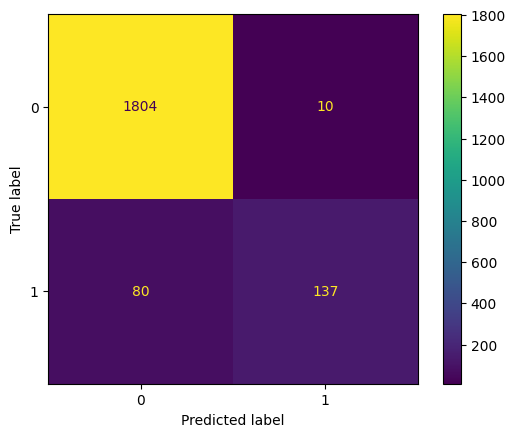

In [154]:
ConfusionMatrixDisplay.from_predictions(target_train,ensembled_tr_pred)
ConfusionMatrixDisplay.from_predictions(target_val,ensembled_val_pred)

In [155]:
train_f1 = f1_score(target_train,ensembled_tr_pred)
val_f1 = f1_score(target_val,ensembled_val_pred)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 0.937021777516186
val F1 Score - 0.7527472527472527


In [148]:
### Ensemble of classifiers

tr_pred_rf=bestrf.predict(features_train)
tr_pred_knn=knn.predict(features_train)
tr_pred_dt=bestdt.predict(features_train)
tr_pred_gbc=best_gbc.predict(features_train)

ensembled_tr_pred=[]

for i in range(len(tr_pred_dt)):
  sum_preds=tr_pred_rf[i]+tr_pred_knn[i]+tr_pred_dt[i]+tr_pred_gbc[i]
  if sum_preds>=2:
    ensembled_tr_pred.append(1)
  else:
    ensembled_tr_pred.append(0)

In [149]:
### Ensemble of classifiers
val_pred_rf=bestrf.predict(features_val)
val_pred_knn=knn.predict(features_val)
val_pred_dt=bestdt.predict(features_val)
val_pred_gbc=best_gbc.predict(features_val)


ensembled_val_pred=[]

for i in range(len(val_pred_dt)):
  sum_preds=val_pred_rf[i]+val_pred_knn[i]+val_pred_dt[i]+tr_pred_gbc[i]
  if sum_preds>=2:
    ensembled_val_pred.append(1)
  else:
    ensembled_val_pred.append(0)

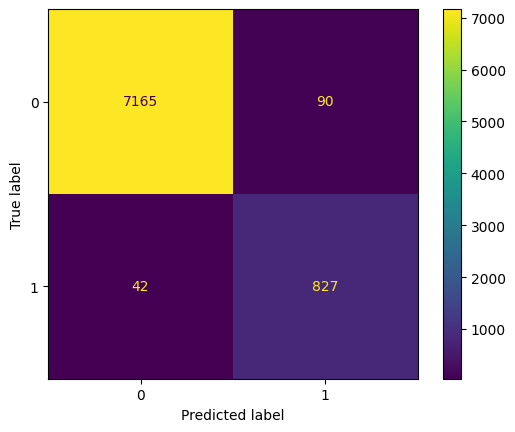

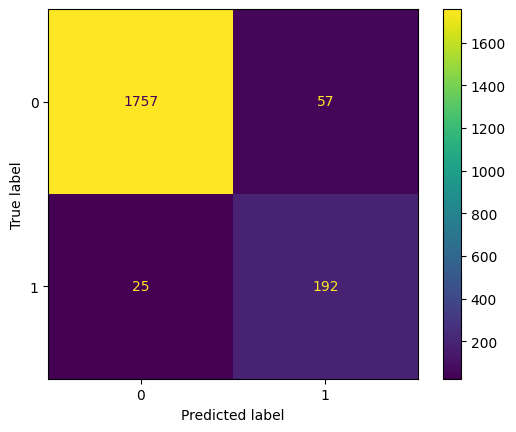

In [150]:
ConfusionMatrixDisplay.from_predictions(target_train,ensembled_tr_pred)
ConfusionMatrixDisplay.from_predictions(target_val,ensembled_val_pred)

In [151]:
train_f1 = f1_score(target_train,ensembled_tr_pred)
val_f1 = f1_score(target_val,ensembled_val_pred)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 0.9260918253079508
val F1 Score - 0.8240343347639486


In [115]:
 ## Ensemble of classifiers
tr_pred_rf=bestrf.predict(features_train)
tr_pred_lr=bestlr.predict(features_train)
tr_pred_knn=knn.predict(features_train)


ensembled_tr_pred=[]

for i in range(len(tr_pred_lr)):
  sum_preds=tr_pred_rf[i]+tr_pred_lr[i]+tr_pred_knn[i]
  if sum_preds>=2:
    ensembled_tr_pred.append(1)
  else:
    ensembled_tr_pred.append(0)

In [116]:
### Ensemble of classifiers
val_pred_rf=bestrf.predict(features_val)
val_pred_lr=bestlr.predict(features_val)
val_pred_knn=knn.predict(features_val)


ensembled_val_pred=[]

for i in range(len(val_pred_lr)):
  sum_preds=val_pred_rf[i]+val_pred_lr[i]+val_pred_knn[i]
  if sum_preds>=2:
    ensembled_val_pred.append(1)
  else:
    ensembled_val_pred.append(0)

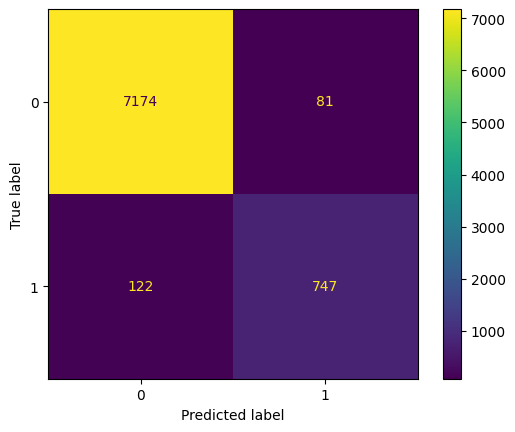

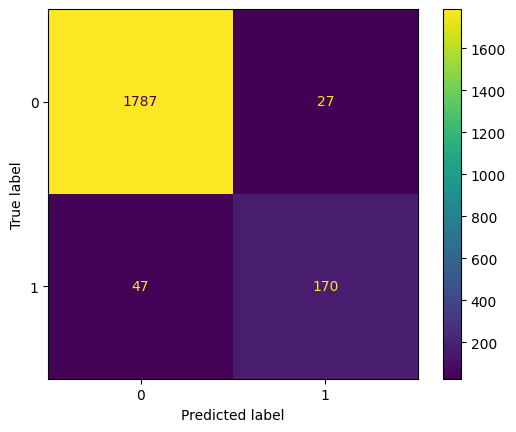

In [117]:
ConfusionMatrixDisplay.from_predictions(target_train,ensembled_tr_pred)
ConfusionMatrixDisplay.from_predictions(target_val,ensembled_val_pred)


In [118]:
train_f1 = f1_score(target_train,ensembled_tr_pred)
val_f1 = f1_score(target_val,ensembled_val_pred)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 0.8803771361225692
val F1 Score - 0.8212560386473431


In [143]:
 ## Ensemble of classifiers
tr_pred_rf=bestrf.predict(features_train)
tr_pred_dt=bestdt.predict(features_train)
tr_pred_knn=knn.predict(features_train)


ensembled_tr_pred=[]

for i in range(len(tr_pred_rf)):
  sum_preds=tr_pred_rf[i]+tr_pred_dt[i]+tr_pred_knn[i]
  if sum_preds>=2:
    ensembled_tr_pred.append(1)
  else:
    ensembled_tr_pred.append(0)

In [144]:
### Ensemble of classifiers
val_pred_rf=bestrf.predict(features_val)
val_pred_dt=bestdt.predict(features_val)
val_pred_knn=knn.predict(features_val)


ensembled_val_pred=[]

for i in range(len(val_pred_rf)):
  sum_preds=val_pred_rf[i]+val_pred_dt[i]+val_pred_knn[i]
  if sum_preds>=2:
    ensembled_val_pred.append(1)
  else:
    ensembled_val_pred.append(0)

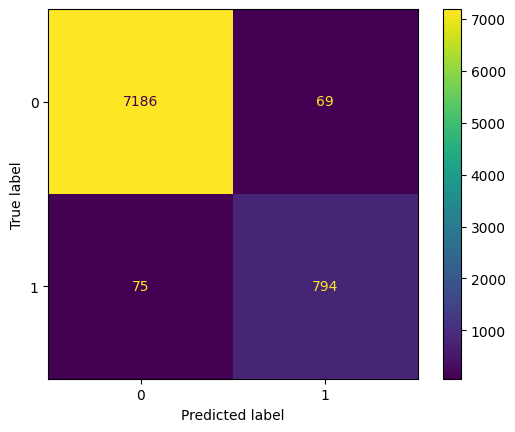

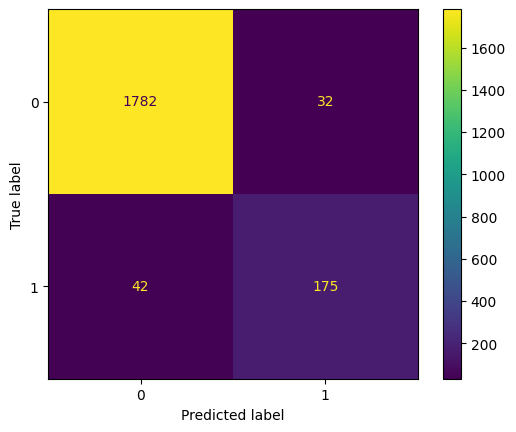

In [145]:
ConfusionMatrixDisplay.from_predictions(target_train,ensembled_tr_pred)
ConfusionMatrixDisplay.from_predictions(target_val,ensembled_val_pred)

In [147]:
train_f1 = f1_score(target_train,ensembled_tr_pred)
val_f1 = f1_score(target_val,ensembled_val_pred)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 0.9168591224018476
val F1 Score - 0.8254716981132075


In [157]:
# svm
from sklearn.svm import SVC

svc = SVC()
svc.fit(features_train,target_train)

SVC()

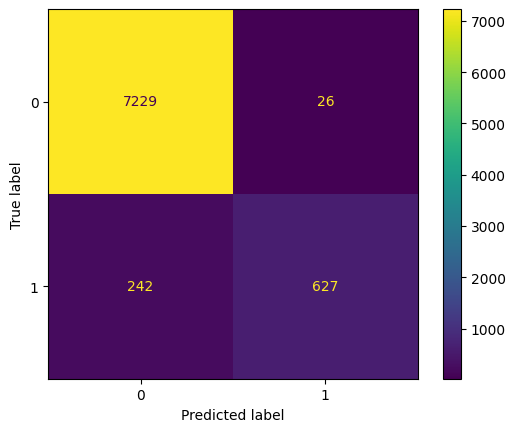

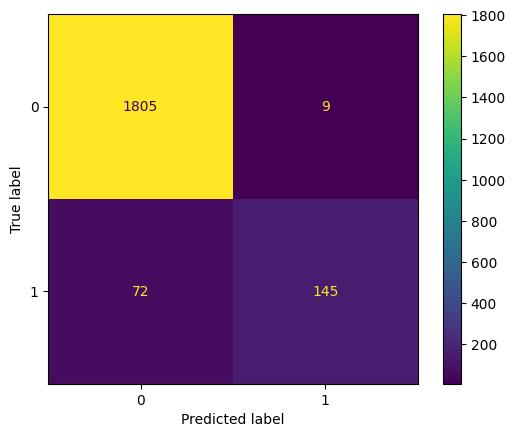

In [158]:
## model prediction here ###
tr_pred = svc.predict(features_train)
val_pred = svc.predict(features_val)
ConfusionMatrixDisplay.from_predictions(target_train,tr_pred)
ConfusionMatrixDisplay.from_predictions(target_val,val_pred)

In [159]:
train_f1 = f1_score(target_train,tr_pred)
val_f1 = f1_score(target_val,val_pred)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 0.823915900131406
val F1 Score - 0.7816711590296497


# svm - BEST prediction

In [240]:
# svm - BEST prediction
from sklearn.svm import SVC

svc = SVC(class_weight={0:1,1:3.5},C=0.99,degree=6,random_state=42)
svc.fit(features_train,target_train)

SVC(C=0.99, class_weight={0: 1, 1: 3.5}, degree=6, random_state=42)

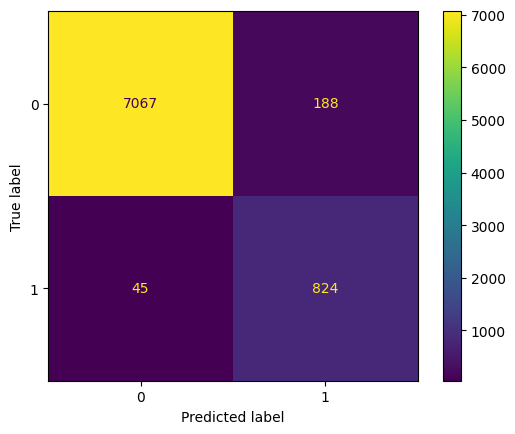

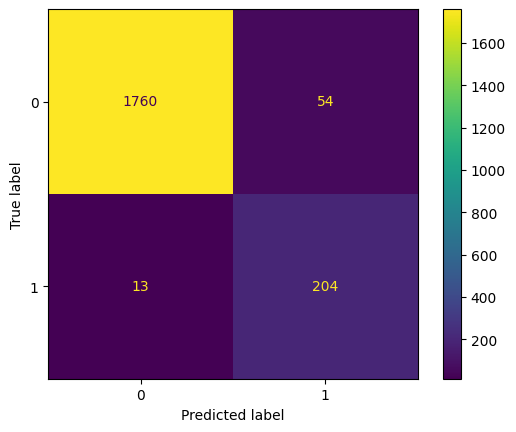

In [241]:
## model prediction here ### BEST prediction
tr_pred = svc.predict(features_train)
val_pred = svc.predict(features_val)
ConfusionMatrixDisplay.from_predictions(target_train,tr_pred)
ConfusionMatrixDisplay.from_predictions(target_val,val_pred)

In [242]:
train_f1 = f1_score(target_train,tr_pred)
val_f1 = f1_score(target_val,val_pred)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 0.8761297182349813
val F1 Score - 0.8589473684210526


In [249]:
# svm
from sklearn.svm import SVC

svc = SVC(class_weight={0:1,1:4.5},C=0.99,degree=7,random_state=42)
svc.fit(features_train,target_train)

SVC(C=0.99, class_weight={0: 1, 1: 4.5}, degree=7, random_state=42)

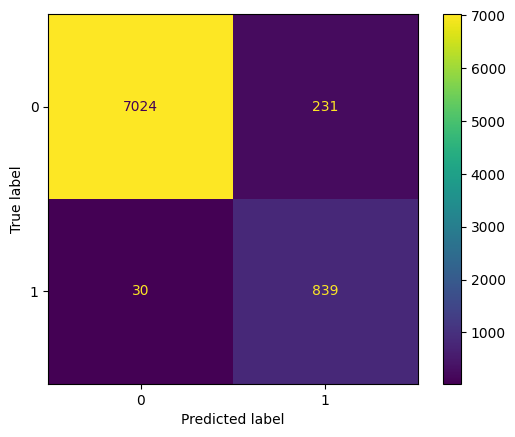

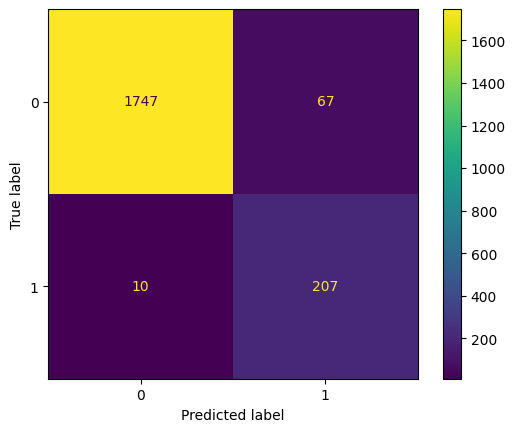

In [250]:
## model prediction here ###
tr_pred = svc.predict(features_train)
val_pred = svc.predict(features_val)
ConfusionMatrixDisplay.from_predictions(target_train,tr_pred)
ConfusionMatrixDisplay.from_predictions(target_val,val_pred)

In [251]:
train_f1 = f1_score(target_train,tr_pred)
val_f1 = f1_score(target_val,val_pred)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 0.8653945332645694
val F1 Score - 0.8431771894093687


#  GridSearchCV FOR SVM

In [253]:
#GridSearchCV
svc_gv = SVC()
params_grid={
    "C":[0.78,0.88,0.99,1.1,1.2],
    "class_weight":[{0:1,1:3.5},{0:1,1:4},{0:0.9,1:4.5}],
    "degree":[6,7,8],
    "random_state":[42]
}

grid_search_cv=GridSearchCV(
    estimator=svc_gv,
    param_grid=params_grid,
    scoring="f1",
    cv=5,
    return_train_score=True
)
grid_search_cv.fit(features_train,target_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.78, 0.88, 0.99, 1.1, 1.2],
                         'class_weight': [{0: 1, 1: 3.5}, {0: 1, 1: 4},
                                          {0: 0.9, 1: 4.5}],
                         'degree': [6, 7, 8], 'random_state': [42]},
             return_train_score=True, scoring='f1')

In [260]:
#GridSearchCV

svc_gv = SVC()
params_grid={
    "C":[0.78,0.88,0.99,1.1,1.2],
    "kernel":["rbf","poly"],
    "gamma": [0.04,0.05,0.06],
    "class_weight": [{0:1,1:3.5},{0:1,1:4},{0:0.9,1:4.5}],
    "degree":[3,4,5],
    "random_state":[42]
}

grid_search_cv=GridSearchCV(
    estimator=svc_gv,
    param_grid=params_grid,
    scoring="f1",
    cv=5,
    return_train_score=True
)
grid_search_cv.fit(features_train,target_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.78, 0.88, 0.99, 1.1, 1.2],
                         'class_weight': [{0: 1, 1: 3.5}, {0: 1, 1: 4},
                                          {0: 0.9, 1: 4.5}],
                         'degree': [3, 4, 5], 'gamma': [0.04, 0.05, 0.06],
                         'kernel': ['rbf', 'poly'], 'random_state': [42]},
             return_train_score=True, scoring='f1')

In [261]:
results_df=pd.DataFrame({
    "Parameters":grid_search_cv.cv_results_["params"],
    "MeanTrainScore":grid_search_cv.cv_results_["mean_train_score"],
    "MeanTestScore":grid_search_cv.cv_results_["mean_test_score"]})

In [262]:
results_df.to_csv("GridSearchPerformannce_svc1.csv",index=None)

In [ ]:
# best svc -1
#{'C': 1.2, 'class_weight': {0: 1, 1: 3.5}, 'degree': 6, 'random_state': 42}
# MeanTrainScore -0.880569808285088
# MeanTestScore - 0.850693137946377
#
# best SVC -2
#SVC(C=0.99, class_weight={0: 1, 1: 3.5}, degree=6, random_state=42)
#train F1 Score - 0.8761297182349813
#val F1 Score - 0.8589473684210526

#best SVC -3
#SVC(C=0.99, class_weight={0: 1, 1: 4.5}, degree=7, random_state=42)
#train F1 Score - 0.8653945332645694
#val F1 Score - 0.8431771894093687


# OVERfitting
# {'C': 0.78, 'class_weight': {0: 1, 1: 3.5}, 'degree': 5, 'gamma': 0.05, 'kernel': 'poly', 'random_state': 42}
# MeanTrainScore-0.999856218547807
# MeanTestScore - 0.857892631287702

# SVM

In [206]:
# svm

svc = SVC(kernel="poly",C=0.99,degree=3,gamma=0.05,random_state=42)
svc.fit(features_train,target_train)

SVC(C=0.99, gamma=0.05, kernel='poly', random_state=42)

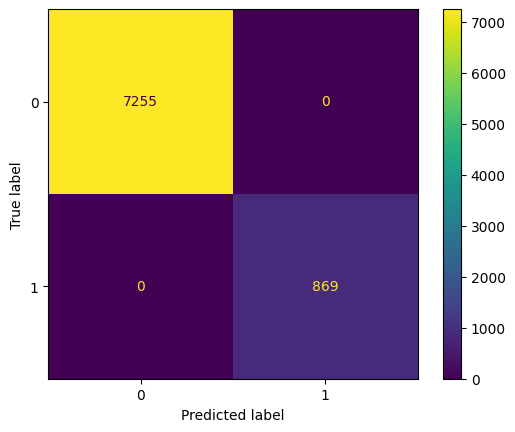

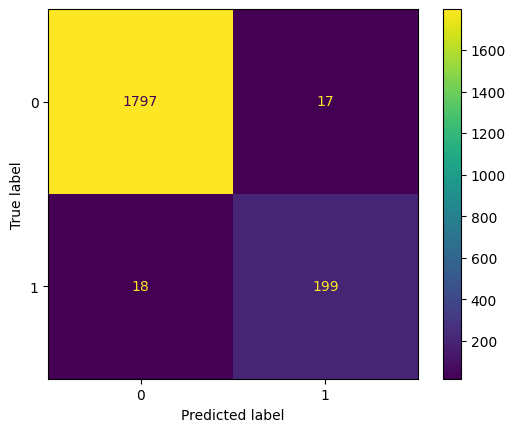

In [207]:
## model prediction here ###
tr_pred = svc.predict(features_train)
val_pred = svc.predict(features_val)
ConfusionMatrixDisplay.from_predictions(target_train,tr_pred)
ConfusionMatrixDisplay.from_predictions(target_val,val_pred)

In [208]:
train_f1 = f1_score(target_train,tr_pred)
val_f1 = f1_score(target_val,val_pred)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 1.0
val F1 Score - 0.9191685912240184


# best values for Ensemble of classifiers like bestlr+bestrf+knn(best logistic regression,best random forest, KNeighborsClassifier)


# train F1 Score - 0.8803771361225692
# val F1 Score - 0.8212560386473431



### **BEST MODEL Prediction** **Is** **Support Vector Machines**(svm)-SVC WITH TRAIN AND VALIDATION SCORE




1.   MeanTrainScore -0.880569808285088
2.   MeanTestScore - 0.850693137946377
